In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv("Wage.csv")

In [28]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


marriedDummies = pd.DataFrame(pd.get_dummies(pd.DataFrame(data['maritl']), prefix='maritl')['maritl_2. Married'])
neverMarriedDummies =  pd.DataFrame(pd.get_dummies(pd.DataFrame(data['maritl']), prefix='maritl')['maritl_1. Never Married'])
maleDummies =   pd.get_dummies(pd.DataFrame(data['sex']), prefix='sex')
whiteDummies =   pd.DataFrame(pd.get_dummies(pd.DataFrame(data['race']), prefix='race')['race_1. White'])
noHSDummies =   pd.DataFrame(pd.get_dummies(pd.DataFrame(data['education']), prefix='education')['education_1. < HS Grad'])
advancedDegDummies =  pd.DataFrame(pd.get_dummies(pd.DataFrame(data['education']), prefix='education')['education_5. Advanced Degree'])

X1 = marriedDummies.join(maleDummies).join(noHSDummies)
X1['married*male'] = marriedDummies['maritl_2. Married'] * maleDummies['sex_1. Male']
X1['married*noHS'] = marriedDummies['maritl_2. Married'] * noHSDummies['education_1. < HS Grad']
X1['male*noHS'] = maleDummies['sex_1. Male'] * noHSDummies['education_1. < HS Grad']


X2 = neverMarriedDummies.join(maleDummies).join(whiteDummies)
X2['not_Married*male'] = neverMarriedDummies['maritl_1. Never Married'] * maleDummies['sex_1. Male']
X2['not_Married*white'] = neverMarriedDummies['maritl_1. Never Married'] * whiteDummies['race_1. White']
X2['white*male'] = whiteDummies['race_1. White'] * maleDummies['sex_1. Male']

y = data['wage']


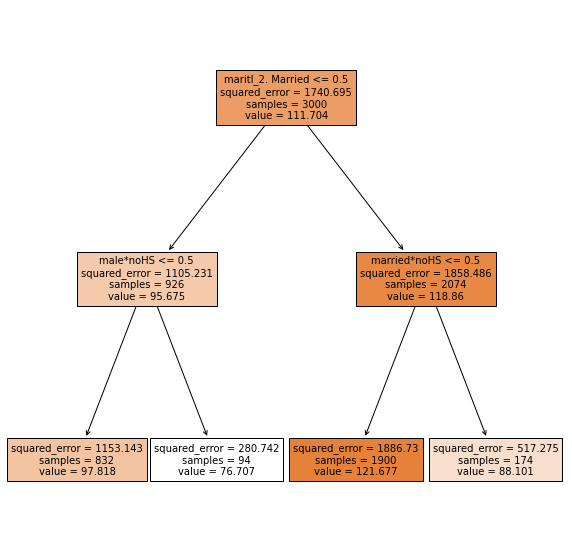

In [31]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=3)

model1 = clf.fit(X1, y)

from sklearn import tree
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, 
                   feature_names=X1.columns,  
                   filled=True)


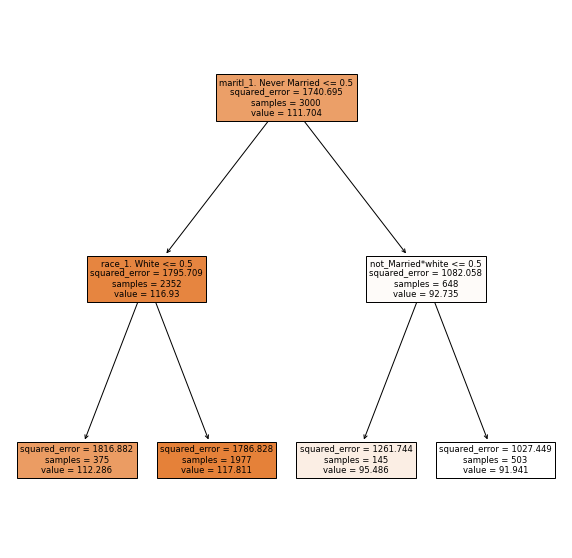

In [30]:
model1 = clf.fit(X2, y)

from sklearn import tree
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, 
                   feature_names=X2.columns,  
                   filled=True)
